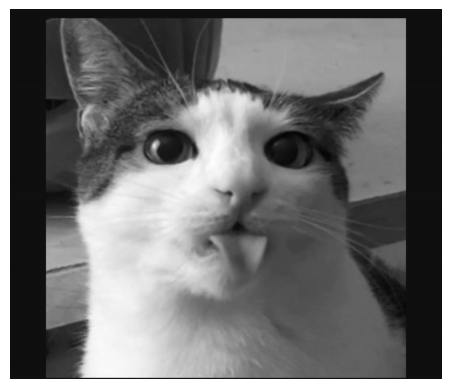

(926, 1080)
749.4449851083715 95 0
801.516844825166 68 0
792.5818560385637 71 0
808.1186937653995 66 0
722.3809636142535 152 0
719.9621072273724 179 0
744.3591074875417 100 0
7941.708213469991 3 0
752.8515125682991 92 0
725.4620991966979 138 0
1107.557191290721 32 0
722.7635737032335 150 0
811.6402207774568 65 0
1022.3948852969329 37 0
736.6775243343506 110 0
2615.124060154451 10 0
764.1504393140096 84 0
1070.0455087450337 34 0
1199.7443654339863 28 0
795.4591994400765 70 0
1150.333235359063 30 0
720.0015749329339 188 0
1505.797865569523 20 0
720.1172167715156 173 0
888.8984698953664 50 0
725.4620991966979 138 0
733.5128007578214 116 0
733.9596879398799 115 0
737.9271295542537 108 0
888.8984698953664 50 0
749.4449851083715 95 1
767.6578567504982 82 1
737.9271295542537 108 1
734.4568262395601 114 1
722.3809636142535 152 1
719.9621072273724 179 1
720.455252410321 199 1
720.8213923672427 164 1
720.8213923672427 164 1
720.5106712344991 200 1
1053.0938272210788 35 1
721.9115123534483 155 1


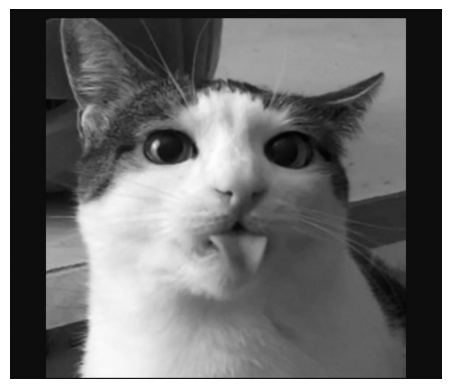

[[14. 14. 14. ... 14. 14. 14.]
 [14. 14. 14. ... 14. 14. 14.]
 [14. 14. 14. ... 14. 14. 14.]
 ...
 [14. 14. 14. ... 14. 14. 14.]
 [14. 14. 14. ... 14. 14. 14.]
 [14. 14. 14. ... 14. 14. 14.]]
[[14.00150723 14.00150723 14.00150723 ... 14.00150723 14.00150723
  14.00150723]
 [14.00150723 14.00150723 14.00150723 ... 14.00150723 14.00150723
  14.00150723]
 [14.00150723 14.00150723 14.00150723 ... 14.00150723 14.00150723
  14.00150723]
 ...
 [14.00315663 14.00315663 14.00315663 ... 14.00315663 14.00315663
  14.00315663]
 [13.97589537 13.97589537 13.97589537 ... 13.97589537 13.97589537
  13.97589537]
 [14.02761523 14.02761523 14.02761523 ... 14.02761523 14.02761523
  14.02761523]]


In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
from math import log10
import math
import random
import cv2
A = imread(os.path.join("../sumit/9dfaf33c-6aa6-445a-94a5-acf3f376f31c.jpg"))
X = A.dot([0.299, 0.5870, 0.114])
U, S, VT = np.linalg.svd(X,full_matrices=False)
sig = np.diag(S)
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()
print(np.shape(X))

n_iterations = 15
c1 = 2
c2 = 2
r1 = random.uniform(0,1)
r2 = random.uniform(0,1)
k_end = 200


def compressed_img(Xapr,k):
    U_k = U[:, :k]
    sig_k = sig[:k, :k]
    VT_k = VT[:k, :]
    cmpd_img = np.dot(U_k , np.dot(sig_k , VT_k))
    a=0
    MSE = ((X-cmpd_img)**2).mean(axis=None)
    PSNR = 10*log10(((255)**2)/MSE)
    if PSNR>0:
        return PSNR
    return -PSNR

O = list(range(1,k_end+1))
gbest = random.choice(O)
k= gbest

def fitness(X,k):
    k = k
    Xapr = X
    PSNR=compressed_img(Xapr,k)
    compression_ratio = k*(1+X.shape[1] + X.shape[1])/(X.shape[0]*X.shape[1])
    fitness = ((PSNR) + 5/compression_ratio)*10
    return fitness

class particles:
    def __init__(self,bounds):
        bounds = (1,k_end)
        self.position = np.random.randint(bounds[0],bounds[1])
        self.velocity = 0
        self.best_position = self.position

bounds = (1,k_end)
swarm = [particles(bounds) for _ in range(30)]

for t in range(n_iterations):
    for i in swarm:
        current_fitness = fitness(X, i.position)
        pbest_fitness = fitness(X, i.best_position)
        print(current_fitness,i.position,t)

        if current_fitness < pbest_fitness:
            i.best_position = i.position

        if current_fitness < fitness(X,gbest):
            gbest = i.position
        r1 = random.uniform(0,1)
        r2 = random.uniform(0,1)
        i.velocity = (1-t/n_iterations)*i.velocity + (math.exp(-1+t/n_iterations))*r1*c1*(i.best_position-i.position) + r2*c2*(gbest-i.position)
        i.position = i.position + int(math.floor(i.velocity+0.5))
        if i.position < bounds[0]:
            i.position = bounds[0]
        elif i.position > bounds[1]:
            i.position = bounds[1]
print('gbest :',gbest)
print('compression ratio is:', gbest*(1+X.shape[1] + X.shape[1])/(X.shape[0]*X.shape[1]))
k = gbest
PSNR = compressed_img(X,k)
print('PSNR is:',PSNR)
Xcmp = np.dot(U[:,:gbest], np.dot(sig[:gbest, :gbest], VT[:gbest, :]))
img = plt.imshow(Xcmp)
img.set_cmap('gray')
plt.axis('off')
plt.show()
print(X)
print(Xcmp)